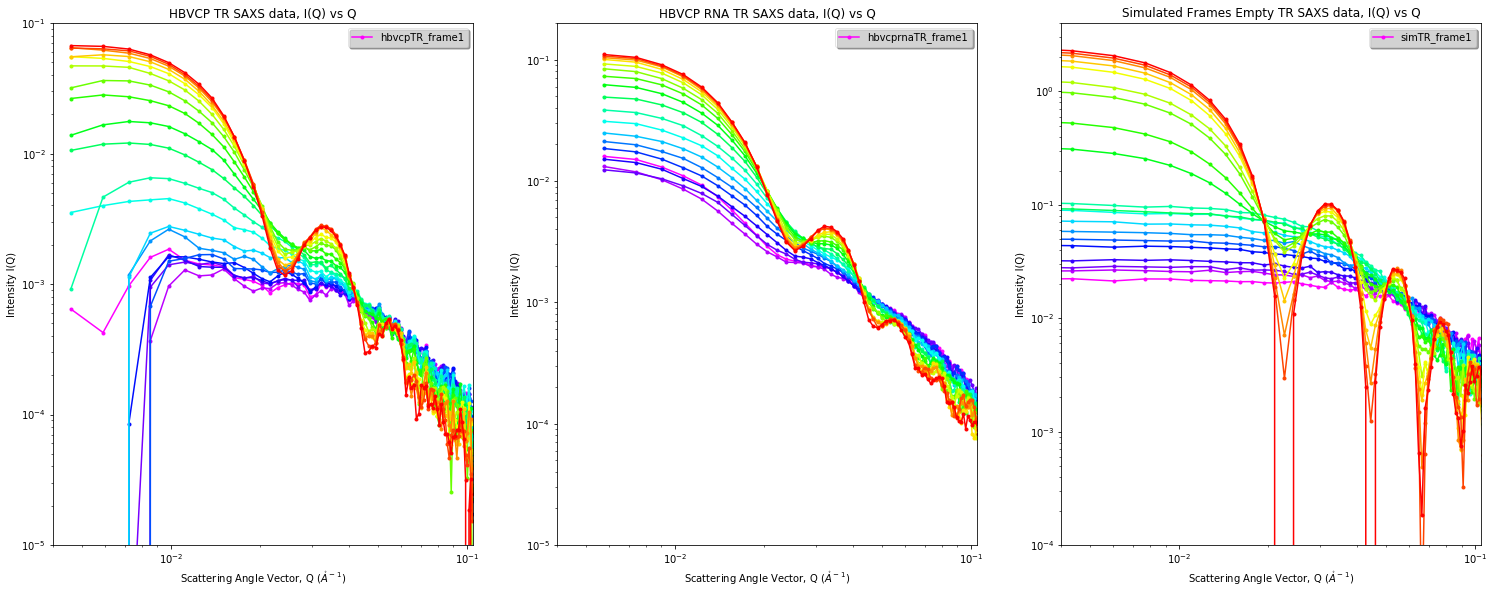

In [88]:
#Call package dependencies_______________________________
import collections
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

###Setup and import Data_________________________________
n_frames_empty = 20
n_frames_RNA = 18

#create filename arrays for exptl data__________________
filenames_empty = ["Box Sync/HBVCP_RyanO/SAXS_ESRF/TR-SAXSdata/FinalDataSets/HBVCP_empty_assembly/HBVCP_frame{0}_smb.dat".format(k) for k in range(1,n_frames_empty+1)]
filenames_RNA = ["Box Sync/HBVCP_RyanO/SAXS_ESRF/TR-SAXSdata/FinalDataSets/HBVCP_RNA_assembly/HBVCP_RNA_frame{0}_smb.dat".format(k) for k in range(1,n_frames_RNA+1)]

#create frame data array dictionary_____________________
#for the hbvcp empty TR data set:
dct_empty = collections.OrderedDict()
for x in range(1,n_frames_empty+1):
    dct_empty['hbvcpTR_frame%s' %x] = []
#load file data into frames
for x in range(1,n_frames_empty+1):
    dct_empty['hbvcpTR_frame%s' %x] = np.loadtxt(filenames_empty[x-1], skiprows=0)
#for the hbvcp rna TR data set:
dct_RNA = collections.OrderedDict()
for x in range(1,n_frames_RNA+1):
    dct_RNA['hbvcprnaTR_frame%s' %x] = []
for x in range(1,n_frames_RNA+1):
    dct_RNA['hbvcprnaTR_frame%s' %x] = np.loadtxt(filenames_RNA[x-1], skiprows=0)

#Create Figure and subplots_______________________________
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6.4*2*2,4.8*2))
#Create rainbow color inputs
rainbow20 = np.loadtxt("Box Sync/HBVCP_RyanO/SAXS_ESRF/rainbow20.txt", skiprows=0, comments='!', dtype=np.str)
rb20 = [rainbow20[:,0]]
rainbow18 = np.loadtxt("Box Sync/HBVCP_RyanO/SAXS_ESRF/rainbow18.txt", skiprows=0, comments='!', dtype=np.str)
rb18 = [rainbow18[:,0]]

#Import simulated data__________________________________
I_Q_E = np.loadtxt("C:/Users/Ryan Oliver/Box Sync/HBVCP_RyanO/SAXS_ESRF/sim/I_Q_E.csv",delimiter=',',skiprows=1)
frames_sim = [[] for x in range(1,22)]

for x in range(len(frames_sim)):
    frames_sim[x].append((I_Q_E[x,:]))
#plot simulated data______________________________________
for x in range(1,21):
    ax3.plot(frames_sim[0][0], frames_sim[x][0], color=str(rb20[0][x-1]), marker='o', ms=3)
#ax1.plot(range(1,296),(simSAXS_C[frame_n-1,0]*simSAXS_S[:,0])+(simSAXS_C[frame_n-1,1]*simSAXS_S[:,1])+(simSAXS_C[frame_n-1,2]*simSAXS_S[:,2]))


#plot experimental data, empty HBVCP set_________________
for x in range(1,n_frames_empty+1):
    #with errorbars:
    #ax1.errorbar(dct_empty['hbvcpTR_frame%s' %x][:,0], dct_empty['hbvcpTR_frame%s' %x][:,1], yerr=dct_empty['hbvcpTR_frame%s' %x][:,2], fmt='-o', ms=2)
    #without errorbars:
    ax1.errorbar(dct_empty['hbvcpTR_frame%s' %x][:,0], dct_empty['hbvcpTR_frame%s' %x][:,1], fmt='-o', ms=3, color=str(rb20[0][x-1]))
#ax1.errorbar(dct_empty['hbvcpTR_frame1'][:,0], dct_empty['hbvcpTR_frame1'][:,1], yerr=dct_empty['hbvcpTR_frame1'][:,2], fmt='-o')
#plot experimental data, HBVCP with RNA set______________
for x in range(1,n_frames_RNA+1):
    #with errorbars:
    #ax2.errorbar(dct_RNA['hbvcprnaTR_frame%s' %x][:,0], dct_RNA['hbvcprnaTR_frame%s' %x][:,1], yerr=dct_RNA['hbvcprnaTR_frame%s' %x][:,2], fmt='-o', ms=2)
    #without errorbars:
    ax2.errorbar(dct_RNA['hbvcprnaTR_frame%s' %x][:,0], dct_RNA['hbvcprnaTR_frame%s' %x][:,1], fmt='-o', ms=3, color=str(rb18[0][x-1]))

#Create legend and define axes____________________________
leg = ax1.legend(['hbvcpTR_frame1'],loc='best', ncol=1, mode='', shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
#Customize axes
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(10**-5,10**-1)
ax1.set_xlim(0.004,0.105)
#Set Labels
ax1.set_title('HBVCP TR SAXS data, I(Q) vs Q')
ax1.set_ylabel('Intensity I(Q)')
ax1.set_xlabel('Scattering Angle Vector, Q ($\mathring{A}$$^-$$^1$)')

leg = ax2.legend(['hbvcprnaTR_frame1'],loc='best', ncol=1, mode='', shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
#Customize axes
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(10**-5,2*10**-1)
ax2.set_xlim(0.004,0.105)
#Set Labels
ax2.set_title('HBVCP RNA TR SAXS data, I(Q) vs Q')
ax2.set_ylabel('Intensity I(Q)')
ax2.set_xlabel('Scattering Angle Vector, Q ($\mathring{A}$$^-$$^1$)')

leg = ax3.legend(['simTR_frame1'],loc='best', ncol=1, mode='', shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
#Customize axes
ax3.set_ylim(.0001,4)
ax3.set_xlim(0.004,0.105)
ax3.set(xlabel='Scattering Angle Vector, Q ($\mathring{A}$$^-$$^1$)', ylabel='Intensity I(Q)',
        xscale='log', yscale='log',
       title='Simulated Frames Empty TR SAXS data, I(Q) vs Q')

plt.show()

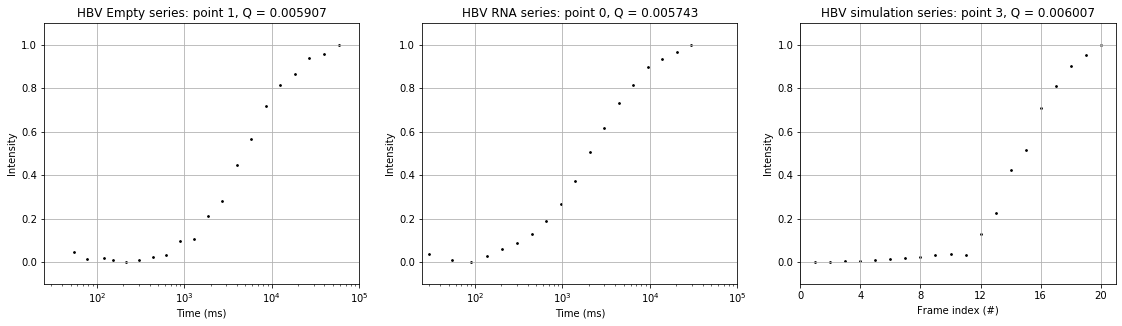

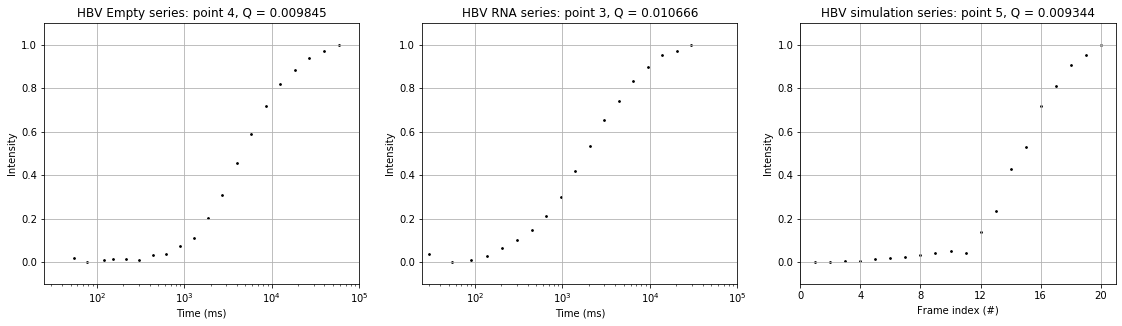

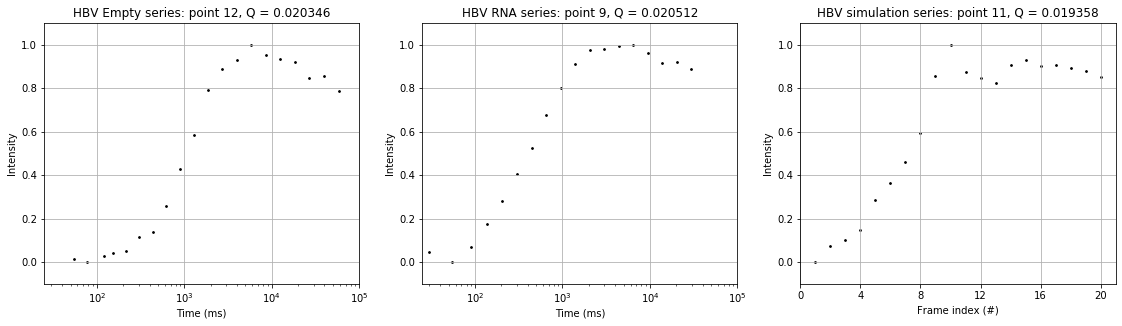

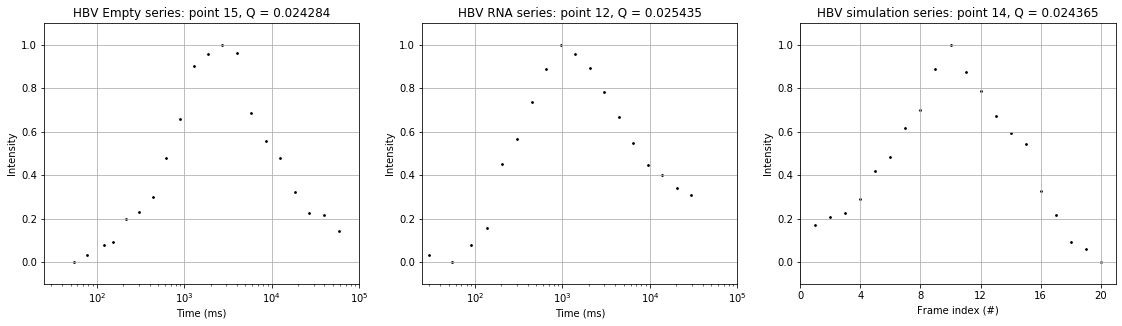

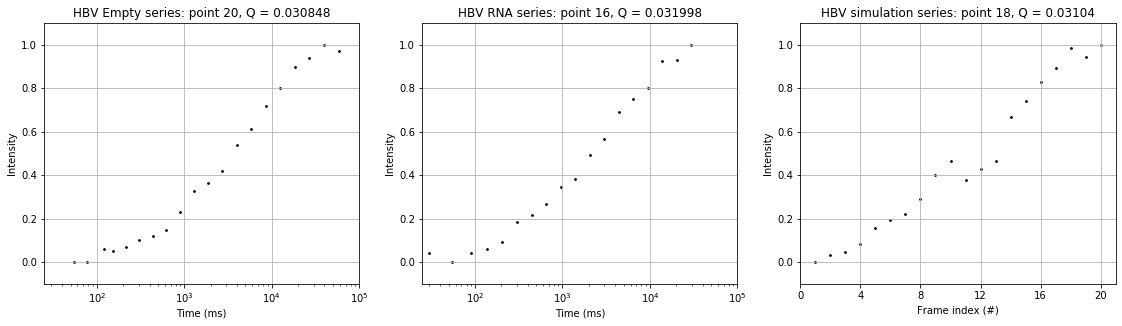

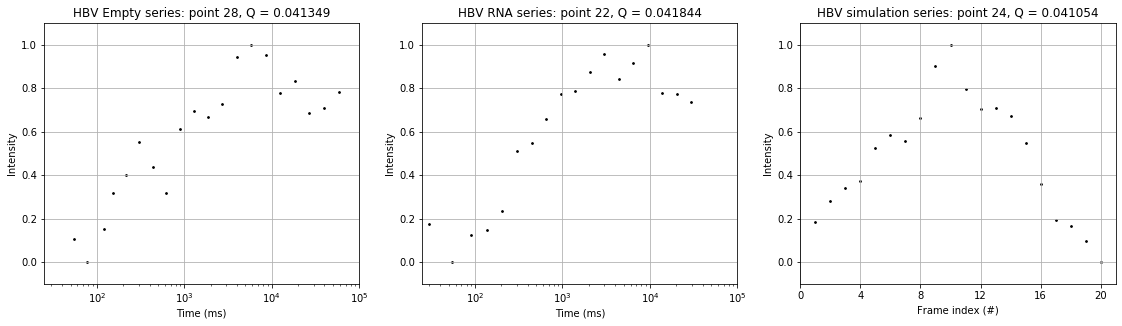

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#select q-point numbers for plotting across all frames for each TR-SAXS data sets
empty_qplotpoint=[1,4,12,15,20,28]
rna_qplotpoint=[0,3,9,12,16,22]
sim_qplotpoint=[3,5,11,14,18,24]

#or use a common set of point index values:
qplotpoint=[0,1,2,3]#And following line must be uncommented out
#empty_qplotpoint=qplotpoint;rna_qplotpoint=qplotpoint;sim_qplotpoint=qplotpoint


#######################   DO NOT MAKE CHANGES BELOW THIS LINE   #########################

empty_time_x = [55,78,120,153,216,305,433,620,892,1289,1871,2724,3976,5815,8513,12478,18304,26867,39451,57949]
rna_time_x = [30,55,89.4,137.6,206.1,304.5,446.8,653.6,955.3,1396.4,2042.4,2989.7,4380,6421.2,9419.6,13825,20298,29812]

for n1,n2,n3 in zip(empty_qplotpoint,rna_qplotpoint,sim_qplotpoint):
    empty_scaled_frame = [];rna_scaled_frame = [];sim_scaled_frame = [];
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6.4*3,4.8*1))
    #print("Q = ",dct_empty['hbvcpTR_frame1'][n1,0])
    #print("Q = ",dct_RNA['hbvcprnaTR_frame1'][n2,0])

    for x in range(1,n_frames_empty+1):
        #print(x);print(dct_empty['hbvcpTR_frame%s' %x][qplotpoint[n1],1])
        #Create left-hand plot
        #ax1.scatter(x,dct_empty['hbvcpTR_frame%s' %x][n1,1],c='black',s=3)
        #or do scaling:
        empty_scaled_frame.append(dct_empty['hbvcpTR_frame%s' %x][n1,1])
        #print(dct_empty['hbvcpTR_frame%s' %x][qplotpoint[x],1])
    #print(scaled_frame);print(empty_time_x)
    empty_scaled_frame = empty_scaled_frame - min(empty_scaled_frame)
    empty_scaled_frame = empty_scaled_frame / max(empty_scaled_frame);#print(empty_scaled_frame)
    #create scaled empty plot_______________________________________
    ax1.scatter(empty_time_x[:],empty_scaled_frame[:],c='black',s=3)
    
    for x in range(1,n_frames_RNA+1):
        #print(x);print(dct_RNA['hbvcprnaTR_frame%s' %x][n2,1])
        #ax1.scatter(x,dct_RNA['hbvcprnaTR_frame%s' %x][n2,1],c='black',s=3)
        #or do scaling:
        rna_scaled_frame.append(dct_RNA['hbvcprnaTR_frame%s' %x][n2,1])
        #print(dct_RNA['hbvcprnaTR_frame%s' %x][n2,1])
    #print(scaled_frame);print(rna_time_x)
    rna_scaled_frame = rna_scaled_frame - min(rna_scaled_frame)
    rna_scaled_frame = rna_scaled_frame / max(rna_scaled_frame);#print(rna_scaled_frame)
    #create scaled RNA plot________________________________________
    ax2.scatter(rna_time_x[:],rna_scaled_frame[:],c='black',s=3)
    
    for x in range(1,21):
        #print(x);print(frames[x][n3])
        #Create left-hand plot
        sim_scaled_frame.append(frames[x][0][n3])
        #ax1.scatter(frames[0][0],scaled_frame[x])
    #print(frames[0][0]);#print(empty_time_x)
    sim_scaled_frame = sim_scaled_frame - min(sim_scaled_frame);#print(scaled_frame)
    sim_scaled_frame = sim_scaled_frame / max(sim_scaled_frame);#print(scaled_frame)
    #create scaled sim plot_______________________________________
    ax3.scatter(range(1,21),sim_scaled_frame[:],c='black',s=3)
    
    ax1.set_yscale('linear')
    ax1.set_xscale('log')
    ax1.set_ylim(-0.1,1.1)
    ax1.set_xlim(25,1e5)
    #ax1.set_xticks(np.arange(1,21,1))
    ax1.set_title('HBV Empty series: point '+str(n1)+', Q = '+str(round(dct_empty['hbvcpTR_frame1'][n1,0],6)))
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Intensity')
    ax1.grid()
    
    ax2.set_yscale('linear')
    ax2.set_xscale('log')
    ax2.set_ylim(-0.1,1.1)
    ax2.set_xlim(25,1e5)
    #ax2.set_xticks(np.arange(1,19,1))
    ax2.set_title('HBV RNA series: point '+str(n2)+', Q = '+str(round(dct_RNA['hbvcprnaTR_frame1'][n2,0],6)))
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Intensity')
    ax2.grid()
    
    ax3.set_yscale('linear')
    ax3.set_xscale('linear')
    ax3.set_ylim(-0.1,1.1)
    ax3.set_xlim(0,21)
    ax3.set_xticks(np.arange(1,21,1))
    ax3.set_title('HBV simulation series: point '+str(n3)+', Q = '+str(round(frames_sim[0][0][n3],6)))
    ax3.set_xlabel('Frame index (#)')
    ax3.set_ylabel('Intensity')
    ax3.xaxis.set_major_locator(MultipleLocator(4))
    ax3.yaxis.set_major_locator(MultipleLocator(0.2))
    ax3.yaxis.grid()
    ax3.xaxis.grid()

plt.show()